In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Accuracy

In [3]:
columns = pd.read_csv("multiple_keys_accuracy.csv", index_col=0).columns
columns = [int(x[7:]) for x in columns]

mult_keys = pd.read_csv("multiple_keys_accuracy.csv", index_col=0).to_numpy()
one_key = pd.read_csv("one_key_accuracy.csv", index_col=0).to_numpy()

In [4]:
mult_keys_mean = mult_keys.mean(axis=0)
mult_keys_error = np.array([mult_keys.min(axis=0), mult_keys.max(axis=0)])
mult_keys_error = np.abs(mult_keys_error - mult_keys_mean)

one_key_mean = one_key.mean(axis=0)
one_key_error = np.array([one_key.min(axis=0), one_key.max(axis=0)])
one_key_error = np.abs(one_key_error - one_key_mean)

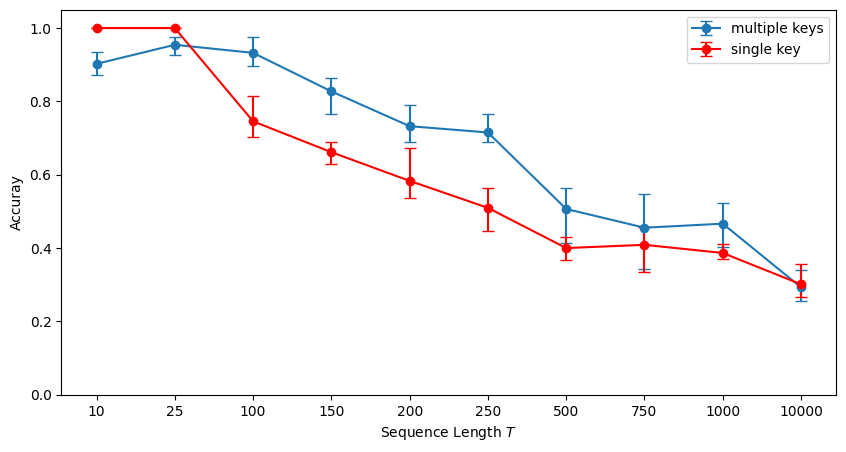

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(
    x=np.arange(len(columns)),
    y=mult_keys_mean,
    fmt="o-",
    yerr=mult_keys_error,
    label="multiple keys",
    capsize=4,
)
ax.errorbar(
    x=np.arange(len(columns)),
    y=one_key_mean,
    fmt="o-",
    color="red",
    yerr=one_key_error,
    label="single key",
    capsize=4,
)
# ax.plot(one_key.to_numpy(), label="single key")
ax.legend(loc="best")
ax.set_ylim([0, 1.05])
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel("Accuray")
ax.set_xlabel("Sequence Length $T$")
plt.show()

## Loss

In [6]:
columns = pd.read_csv("multiple_keys_loss.csv", index_col=0).columns
columns = [int(x[7:]) for x in columns]

mult_keys = pd.read_csv("multiple_keys_loss.csv", index_col=0).to_numpy()
one_key = pd.read_csv("one_key_loss.csv", index_col=0).to_numpy()

In [7]:
mult_keys_mean = mult_keys.mean(axis=0)
mult_keys_error = np.array([mult_keys.min(axis=0), mult_keys.max(axis=0)])
mult_keys_error = np.abs(mult_keys_error - mult_keys_mean)

one_key_mean = one_key.mean(axis=0)
one_key_error = np.array([one_key.min(axis=0), one_key.max(axis=0)])
one_key_error = np.abs(one_key_error - one_key_mean)

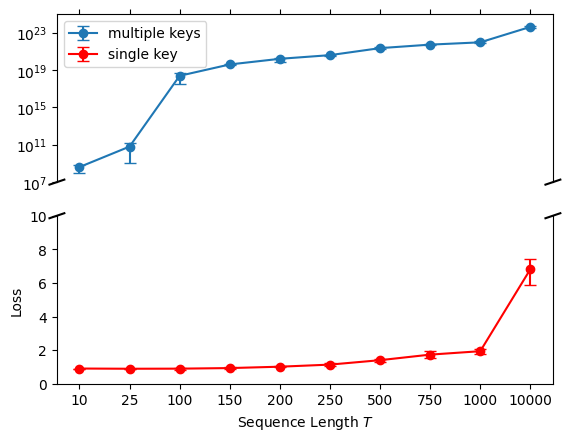

In [23]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.errorbar(
    x=np.arange(len(columns)),
    y=mult_keys_mean,
    fmt="o-",
    yerr=mult_keys_error,
    label="multiple keys",
    capsize=4,
)
ax.errorbar(
    x=np.arange(len(columns)),
    y=one_key_mean,
    fmt="o-",
    color="red",
    yerr=one_key_error,
    label="single key",
    capsize=4,
)
ax2.errorbar(
    x=np.arange(len(columns)),
    y=one_key_mean,
    fmt="o-",
    color="red",
    yerr=one_key_error,
    label="single key",
    capsize=4,
)

ax.set_ylim(1e7, 1e25)
ax.set_yscale("log")
ax2.set_ylim(0, 1e1)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

f.subplots_adjust(hspace=0.2)
ax.legend(loc="best")
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yscale("log")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Sequence Length $T$")
plt.show()